<a href="https://colab.research.google.com/github/seanb7/GEOL-450/blob/main/Bathymetry_and_Magnetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource
from matplotlib import colors as mcolors

In [ ]:
# Implementing Magnetization of the CS_ridge
ascname = "9NMag.asc"
f = open(ascname, "r")

# Read by Lines
for i, line in enumerate(f):
    if i < 7:
      line = line.strip()
      columns = line.split()

      # Read by Header
      if columns[0] == 'ncols':
        ncols = int(columns[1])
      if columns[0] == 'nrows':
        nrows = int(columns[1])
      if columns[0] == 'xllcorner':
        xllcorner = float(columns[1])
      if columns[0] == 'yllcorner':
        yllcorner = float(columns[1])
      if columns[0] == 'cellsize':
        cellsize = float(columns[1])
      if columns[0] == 'nodata_value':
        nodata_value = float(columns[1])

# Create X,Y Mesh
x = cellsize * np.arange(ncols) + xllcorner
y = cellsize * np.arange(nrows) + yllcorner

# Read in the Lines
datamat = np.genfromtxt(ascname, skip_header=6,dtype = float)

# Substitute the nodata value
datamat [datamat == nodata_value] = 'nan'

In [ ]:
# Import ridge data
data = pd.read_csv('CS_ridge.csv')
data.head()

,LON,LAT
0,-102.860,8.100
1,-102.910,8.399
2,-103.105,8.325
3,-103.130,8.355
4,-103.300,8.310


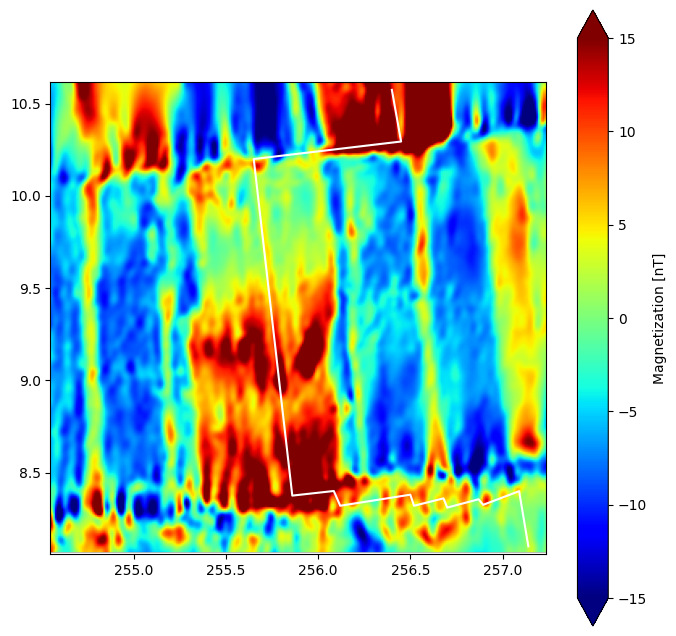

In [ ]:
# Plotting Magnetization
fig, axl = plt.subplots()
cs = plt.imshow(datamat, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'jet', vmin = -15, vmax = 15)
plt.plot(data.LON+360, data.LAT, 'w-')
fig = plt.gcf()
fig.set_size_inches(8,8)
cbar = fig.colorbar(cs, extend = 'both', ax = axl)
cbar.ax.set_ylabel('Magnetization [nT]')
plt.show()
fig.savefig('Magnetization of the CS_ridge.pdf')

In [ ]:
# Implementing Bathmetry of the CS_ridge
ascname2 = "9NBath.asc"
f2 = open(ascname2, "r")

# Read by Lines
for i, line in enumerate(f2):
    if i < 7:
      line = line.strip()
      columns = line.split()

      # Read by Header
      if columns[0] == 'ncols':
        ncols = int(columns[1])
      if columns[0] == 'nrows':
        nrows = int(columns[1])
      if columns[0] == 'xllcorner':
        xllcorner = float(columns[1])
      if columns[0] == 'yllcorner':
        yllcorner = float(columns[1])
      if columns[0] == 'cellsize':
        cellsize = float(columns[1])
      if columns[0] == 'nodata_value':
        nodata_value = float(columns[1])

# Create X,Y Mesh
x2 = cellsize * np.arange(ncols) + xllcorner
y2 = cellsize * np.arange(nrows) + yllcorner

# Read in the Lines
datamat2 = np.genfromtxt(ascname, skip_header=6,dtype = float)

# Substitute the nodata value
datamat2 [datamat2 == nodata_value] = 'nan'

<ipython-input-63-cae3e0105eaf>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


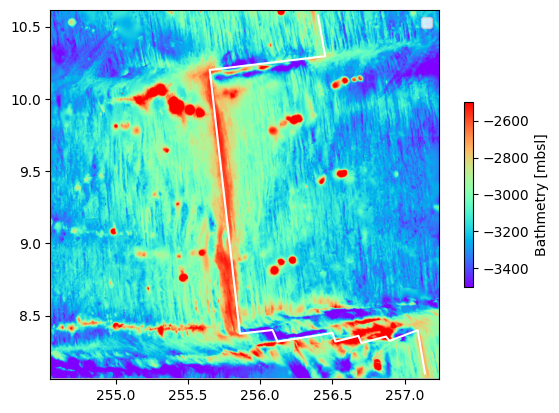

In [ ]:
# Plotting Bathmetry
fig2, ax2 = plt.subplots()
cs = plt.imshow(datamat2, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'rainbow', vmin = -3500, vmax = -2500)
plt.plot(data.LON+360, data.LAT, 'w-')
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax2)
cbar.ax.set_ylabel('Bathmetry [mbsl]')

# Label Geo Features


plt.legend()
plt.show()
fig.savefig('Bathmetry of the CS_ridge.pdf')

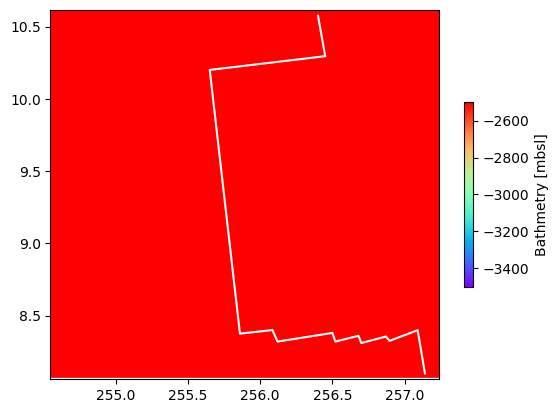

In [67]:
import scipy.ndimage
# Plotting Bathmetry
fig2, ax2 = plt.subplots()
cs = plt.imshow(datamat2, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'rainbow', vmin = -3500, vmax = -2500)
plt.plot(data.LON+360, data.LAT, 'w-')
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax2)
cbar.ax.set_ylabel('Bathmetry [mbsl]')

# Dont allow the grid on top of Data
ax.set_axisbelow(True)
# Turn On Minor Tick Marks
ax.minorticks_on()
# Customize th Major Grid
ax.grid(which = 'major', linestyle = '-', color = 'black')
# Customize the Minor Grid
ax.grid(which = 'minor', linestyle = ':', color = 'gray')

# Show the plot
plt.show()

In [ ]:
# Confirm Latitude for Transecting line
n = 165
n2 = 330
print(y[n], y2[n2])

# Array profile for x vs y
ymag = np.ones(np.size(x))*y[n]
ybath = np.ones(np.size(x2))*y2[n2]

9.50942493970018 9.50942493970018


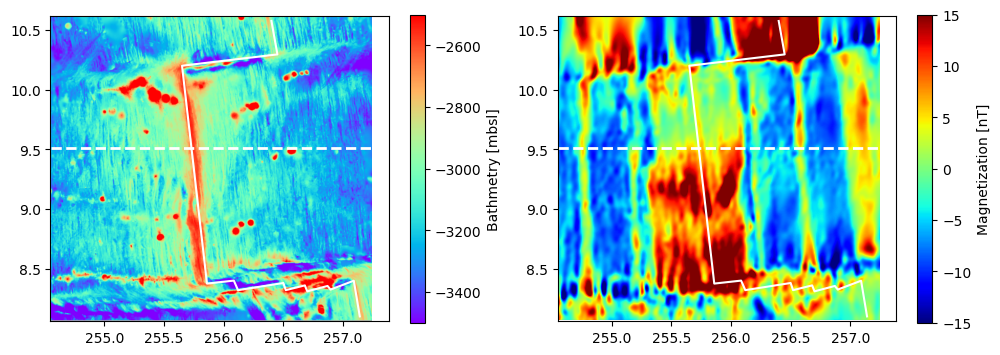

In [ ]:
# Plotting side by side
fig, cax = plt.subplots(1,2, figsize = (12,8))
ax2 = plt.subplot(121)
cs = plt.imshow(datamat2, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'rainbow', vmin = -3500, vmax = -2500)
plt.plot(data.LON+360, data.LAT, 'w-')
plt.plot(x2+360, ybath, 'w--', linewidth = 2)
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax2)
cbar.ax.set_ylabel('Bathmetry [mbsl]')

ax1 = plt.subplot(122)
cs = plt.imshow(datamat, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'jet', vmin = -15, vmax = 15)
plt.plot(data.LON+360, data.LAT, 'w-')
plt.plot(x2+360, ybath, 'w--', linewidth = 2)
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax1)
cbar.ax.set_ylabel('Magnetization [nT]')

plt.show()
fig.savefig('Bathmetry and Magnetization of the CS_ridge.pdf')

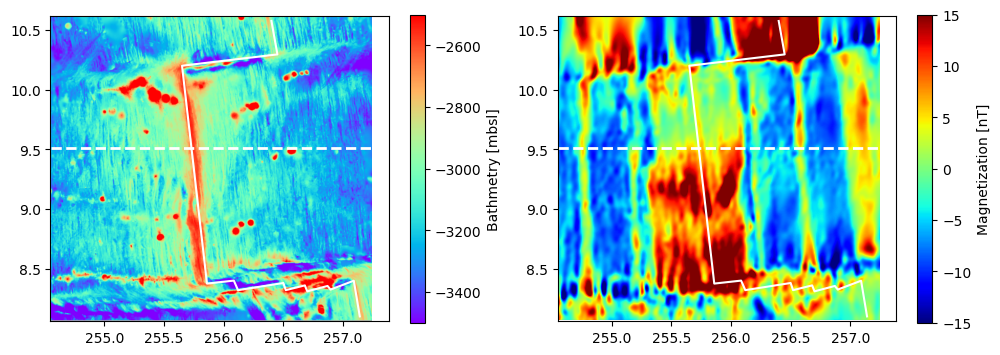

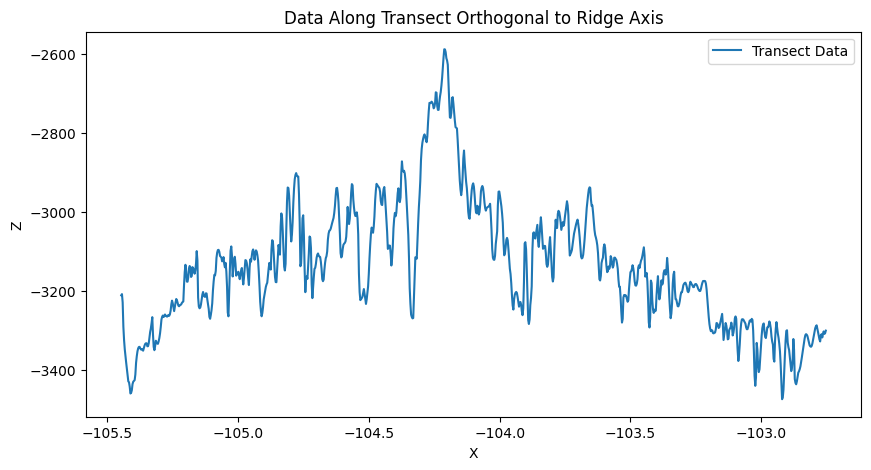

In [ ]:
# Bonus attempt for extracting Data along a transect that is orthogonal to the Ridge Access
fig, cax = plt.subplots(1,2, figsize = (12,8))
ax2 = plt.subplot(121)
cs = plt.imshow(datamat2, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'rainbow', vmin = -3500, vmax = -2500)
plt.plot(data.LON+360, data.LAT, 'w-')
plt.plot(x2+360, ybath, 'w--', linewidth = 2)
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax2)
cbar.ax.set_ylabel('Bathmetry [mbsl]')

ax1 = plt.subplot(122)
cs = plt.imshow(datamat, extent = [x.min(), x.max(), y.min(), y.max()], cmap = 'jet', vmin = -15, vmax = 15)
plt.plot(data.LON+360, data.LAT, 'w-')
plt.plot(x2+360, ybath, 'w--', linewidth = 2)
fig = plt.gcf()
cbar = fig.colorbar(cs, shrink = 0.5, ax = ax1)
cbar.ax.set_ylabel('Magnetization [nT]')

# Assuming x2, y2, and datamat2 represent X, Y, and Z respectively
# If these are incorrect, replace them with the correct variables
X = x2 # Assuming x2 is your X data
Y = y2 # Assuming y2 is your Y data
Z = datamat2 # Assuming datamat2 is your Z data

# Interpolate data along the transect
# Define transect_x and transect_y before using them
transect_x = np.linspace(X.min(), X.max(), 1000)  # Replace with your desired transect
# Make sure transect_y has the same shape as transect_x
transect_y = np.ones_like(transect_x) * ybath[0] # Assuming ybath[0] is your desired y-value for the transect


from scipy.interpolate import griddata # Import griddata

# Create grid for interpolation
xi, yi = np.meshgrid(X, Y)

# Use xi.flatten() and yi.flatten() to create points
points = np.array([xi.flatten(), yi.flatten()]).T
values = Z.flatten()
transect_points = np.array([transect_x, transect_y]).T

transect_data = griddata(points, values, transect_points, method='linear')

# Plot the transect data
plt.figure(figsize=(10, 5))
plt.plot(transect_x, transect_data, label='Transect Data')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Data Along Transect Orthogonal to Ridge Axis')
plt.legend()
plt.show()

In [ ]:
# Export line of the Magnetics to Illustrate the reversals
mag = datamat[n, :]
bath = datamat2[n2, :]

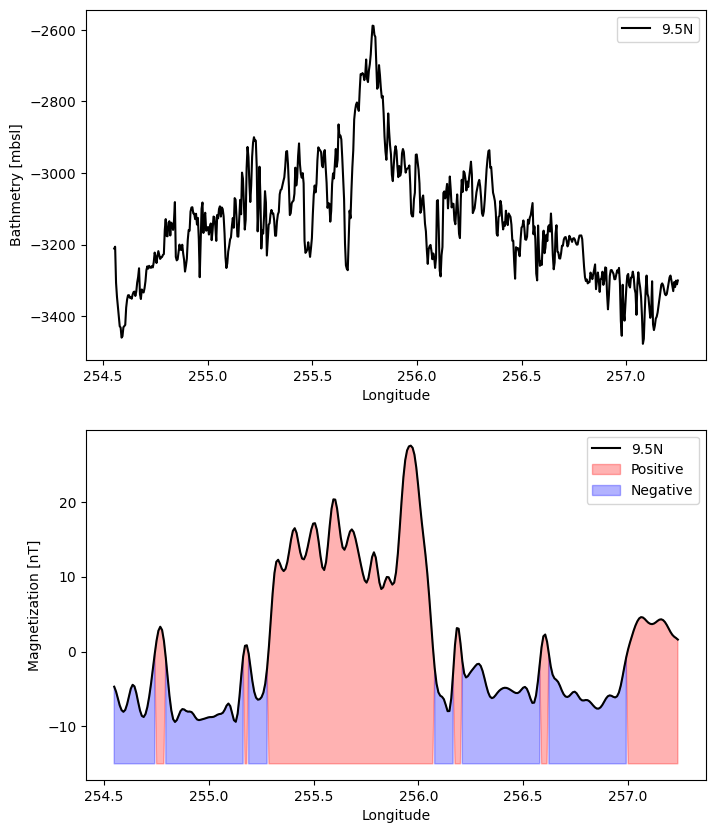

In [ ]:
fig, cax = plt.subplots(2, 1, figsize = (8,10))
plt.subplot(211)
plt.plot(x2 + 360, bath, 'k', label = '9.5N')
plt.xlabel('Longitude')
plt.ylabel('Bathmetry [mbsl]')
plt.legend()

plt.subplot(212)
plt.plot(x, map, 'k', label = '9.5N')
plt.xlabel('Longitude')
plt.ylabel('Magnetization [nT]')
plt.fill_between(x, mag, -15, where = (mag >= 0), alpha = 0.3, color = 'red', interpolate = True, label = 'Positive')
plt.fill_between(x, mag, -15, where = (mag < 0), alpha = 0.3, color = 'blue', interpolate = True, label = 'Negative')
plt.legend()

plt.show()
fig.savefig('Line of the Magnetics.pdf')

In [ ]:
# Convert to Distances from degrees to interpert Length of the reversal
# Find the Ridge Axis
axis = np.where(bath == np.max(bath)) #shallowest point

# Determine distance from dergees in Kilometers
x2_km = (x2 - np.min(x2))*111
x_km = (x - np.min(x))*111

print(x2_km[axis])
print(x_km[axis])

[137.06982422]
[274.13964844]


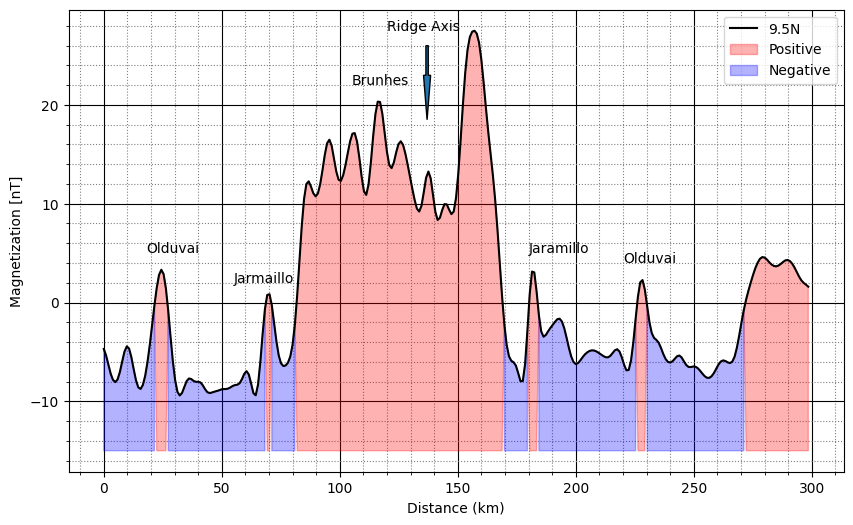

In [ ]:
# Plot Line of Magnetic Reversals
fig, ax = plt.subplots()
plt.plot(x_km, map, 'k', label = '9.5N')
plt.xlabel('Distance (km)')
plt.ylabel('Magnetization [nT]')
plt.fill_between(x_km, mag, -15, where = (mag >= 0), alpha = 0.3, color = 'red', interpolate = True, label = 'Positive')
plt.fill_between(x_km, mag, -15, where = (mag < 0), alpha = 0.3, color = 'blue', interpolate = True, label = 'Negative')

fig = plt.gcf()
fig.set_size_inches(10,6)

# Dont allow the grid on top of Data
ax.set_axisbelow(True)
# Turn On Minor Tick Marks
ax.minorticks_on()
# Customize th Major Grid
ax.grid(which = 'major', linestyle = '-', color = 'black')
# Customize the Minor Grid
ax.grid(which = 'minor', linestyle = ':', color = 'gray')

# Ridge Access (Point of Origin)
plt.arrow(137, 26, 0, -3, width = 1)
plt.text(120, 27.5, "Ridge Axis", family = "sans-serif")

#Label Magnetic Reversal Time Line
plt.text(105, 22, "Brunhes")
plt.text(55, 2, "Jarmaillo")
plt.text(180, 5, "Jaramillo")
plt.text(18, 5, "Olduvai")
plt.text(220, 4, "Olduvai")

plt.legend()
plt.show()
fig.savefig('Line of the Magnetic Reversal.pdf')

In [60]:
# Calculate Spreading Rates of the Plates using Magnetic Reversal Data
# Define magnetic_reversals with ages and distances
magnetic_reversals = [
    (117, 21),  # Brunhes - Normal
    (70, 0.99),  # Jaramillo - Reversed
    (22, 3.8),  # Olduvai - Normal
    (181, 3.6),  # Jaramillo - Reversed
    (248, 2.3),  # Olduvai - Normal
]

# Extract ages and distances
ages = np.array([point[0] for point in magnetic_reversals])
distances = np.array([point[1] for point in magnetic_reversals])

# Calculate spreading rates (km per Million years)
spreading_rates = np.diff(distances) / np.diff(ages)

# Calculate average spreading rate
average_spreading_rate = np.mean(spreading_rates)

# Print results
print("Spreading Rates (km/Myr):", spreading_rates)
print("Average Spreading Rate (km/Myr):", average_spreading_rate)

Spreading Rates (km/Myr): [ 0.42574468 -0.05854167 -0.00125786 -0.01940299]
Average Spreading Rate (km/Myr): 0.08663554186863756
